<a href="https://colab.research.google.com/github/maxmatical/Reinforcement-Learning/blob/master/multi_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


multi-armed bandit problem with nonstationary rewards

Design and conduct an experiment to demonstrate the
difficulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the q(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the q(a) on each step). Prepare plots like
Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, alpha = 0.1. Use
epsilon = 0.1 and longer runs, say of 10,000 steps

In [0]:

n_arms = 10
epsilon = 0.1
alpha = 0.1
n_epochs = 100000

# start the rewards at 1
R = [1.0]*n_arms



In [107]:
print(R)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [108]:
for j in range(len(R)):
    R[j] += np.random.normal(0, 0.01)
    
print(R)
    

[1.010791859898607, 0.9976261984466857, 0.995320177083328, 1.0008634936887157, 1.0049654872121991, 1.0117489113328284, 1.0026072453393078, 1.0098870020014719, 0.9998984554748171, 0.9916922665109538]


In [109]:
# np.random.normal(0, 1)
# print(np.random.uniform(0,1))
print(np.random.randint(0,10))


4


In [110]:
l = [1,2,3]

print(l.index(max(l)))

2


using sample average method $\alpha_n(a) = \dfrac{1}{n}$

In [0]:
Q_old = 0.0
Q_new = 0.0
expected_rewards = [0]*n_arms
Q_SA = []
Q_timestep = []
for i in range(n_epochs):

    # upate rewards
    for j in range(len(R)):
        R[j] += np.random.normal(0, 0.01)
        
    # generate random number for e-greedy algo
    rand = np.random.uniform(0,1)
    
    # initial steps, choose 2 random arms
    if i == 0 or i == 1:
        choice = np.random.randint(0,10) # choose random arm
    
    # exploration step
    elif rand > 1-epsilon:
                choice = np.random.randint(0,10)

    # exploitation step    
    else: 
        # choose the arm with the highest expected reward
        choice = expected_rewards.index(max(expected_rewards)) 
        
        
    expected_rewards[choice] = R[choice] # update expected rewards table
    
    Q_old = Q_new
    reward = R[choice]
    Q_new = Q_old + 1/(i+1)*(reward - Q_old)
    Q_new_nonstationary = Q_old + alpha*(reward - Q_old)
    Q_SA.append(Q_new)
    Q_timestep.append(Q_new_nonstationary)

In [118]:
print(Q_new, Q_new_nonstationary)

7.705368704244403 7.858473148003135


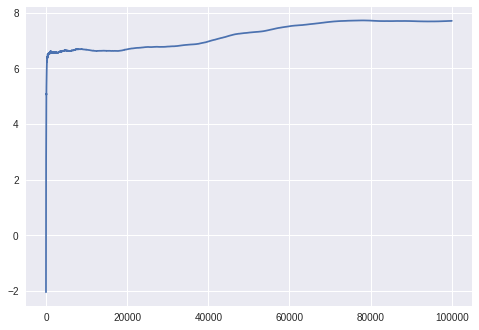

In [116]:
plt.plot(Q_SA)
# plt.show()

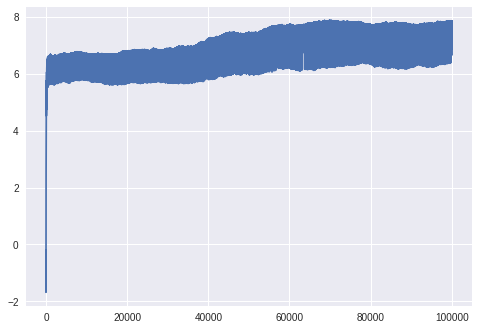

In [117]:
plt.plot(Q_timestep)
